<a href="https://colab.research.google.com/github/OlehVakulchyk/DataScience/blob/main/Hw_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання, що пропонуються, необхідно оформити у вигляді одного jupyter ноутбука.

Завдання 1 У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

Завдання 2 Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [1]:
import pandas as pd
import numpy as np
import zipfile

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Завантажимо два датасети - data_2d.csv та mnist.csv

In [4]:
zip_file = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/data.zip')
files = zip_file.namelist()

In [5]:
files

['data/data_2d.csv', 'data/mnist.csv']

In [6]:
df_2d = pd.read_csv(zip_file.open(files[0]), header=None)
df_mnist = pd.read_csv(zip_file.open(files[1]), header=None)

In [7]:
df_2d

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [8]:
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


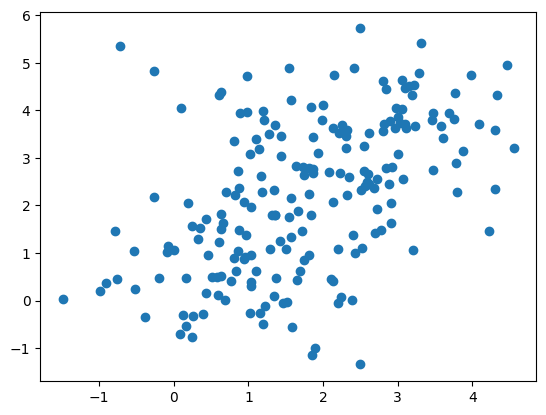

In [10]:
# Побудуємо графік для датасету df_2d
plt.scatter(df_2d[1], df_2d[2])
plt.show()

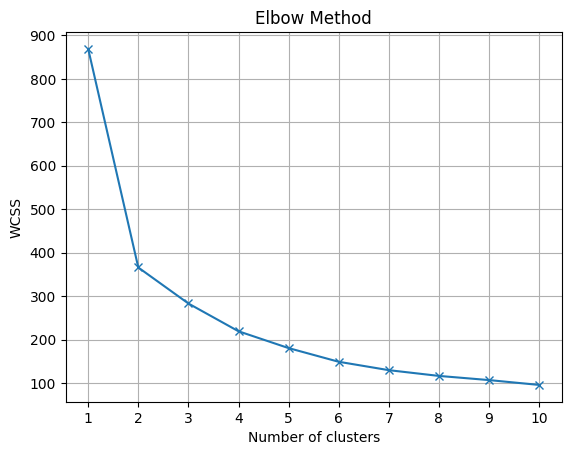

In [11]:
# Ліктевий метод визначення оптимальної кількості кластерів для data_2d
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='x')
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Оптимальна кількість кластерів = 2

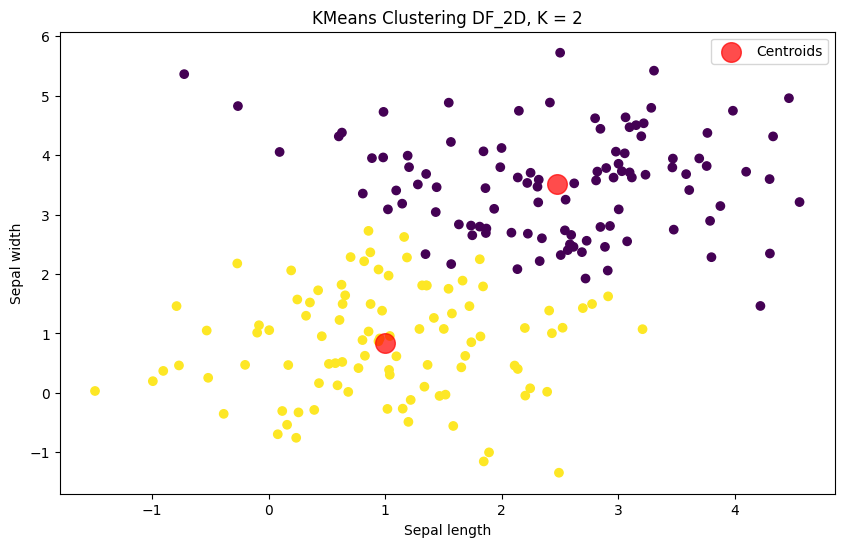

In [13]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_2d)

# create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_2d[1], df_2d[2], c=pred_y, cmap='viridis')

# plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering DF_2D, K = 2')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()


In [14]:
# Нормалізуємо датасет df_mnist
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_mnist)

In [16]:
# Зменшимо розмірність датасету до 2-х вимірного
pca = PCA(2)
principalComponents = pca.fit_transform(df_scaled)
df_mnist_2d = pd.DataFrame(data = principalComponents, columns=[1, 2])
df_mnist_2d.head()

,1,2
0,-4.528525,4.197287
1,5.025221,-12.464219
2,-6.907389,-5.891017
3,8.584200,-0.338227
4,1.105798,6.577202


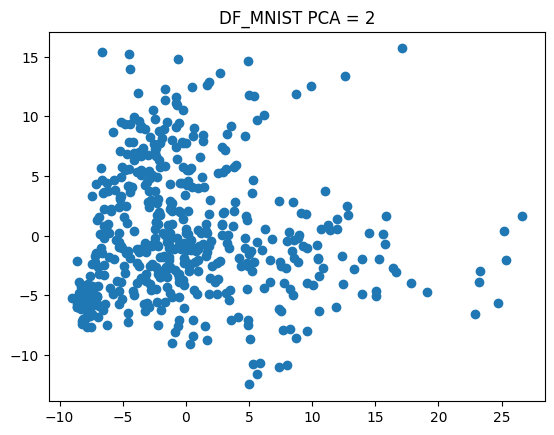

In [18]:
# Побудуємо графік для датасету data_mnist_pca, в якому ми зменшили розмірність
plt.scatter(df_mnist_2d[1], df_mnist_2d[2])
plt.title('DF_MNIST PCA = 2')
plt.show()

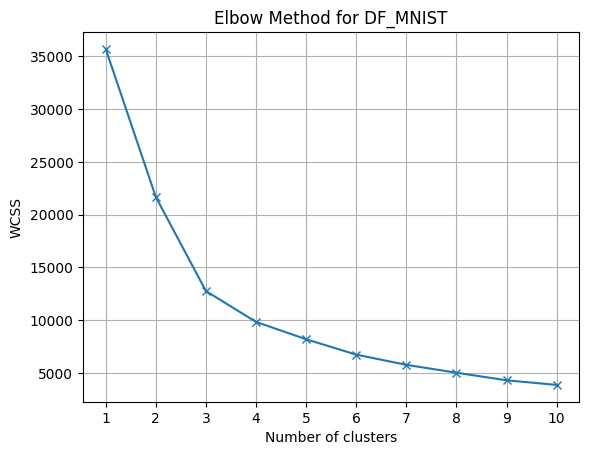

In [19]:
# Ліктевий метод визначення оптимальної кількості кластерів для df_mnist_2d
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_mnist_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='x')
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method for DF_MNIST')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Оптимальна кількість кластерів = 3

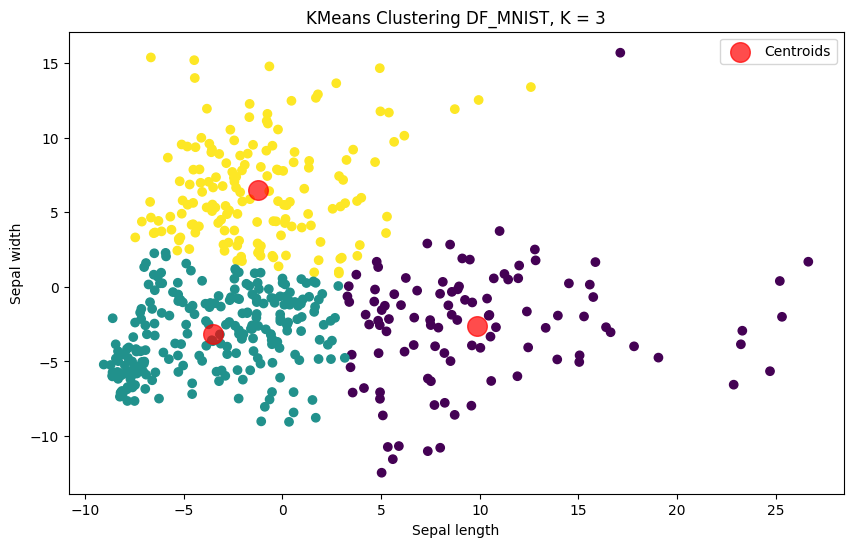

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_mnist_2d)

# create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_mnist_2d[1], df_mnist_2d[2], c=pred_y, cmap='viridis')

# plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering DF_MNIST, K = 3')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()